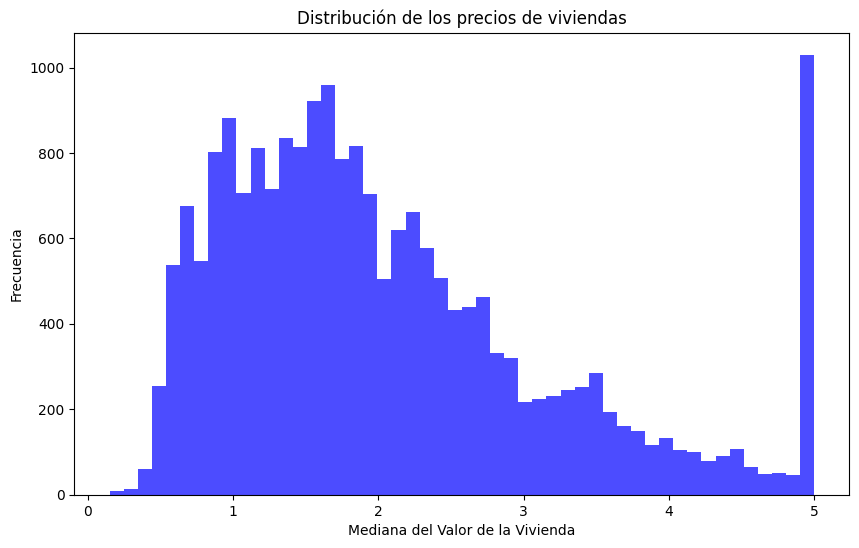

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset
housing = fetch_california_housing()

# Convertir a DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# Visualización inicial
plt.figure(figsize=(10,6))
plt.hist(df['MedHouseVal'], bins=50, color='blue', alpha=0.7)
plt.title('Distribución de los precios de viviendas')
plt.xlabel('Mediana del Valor de la Vivienda')
plt.ylabel('Frecuencia')
plt.show()


## transformaciones log

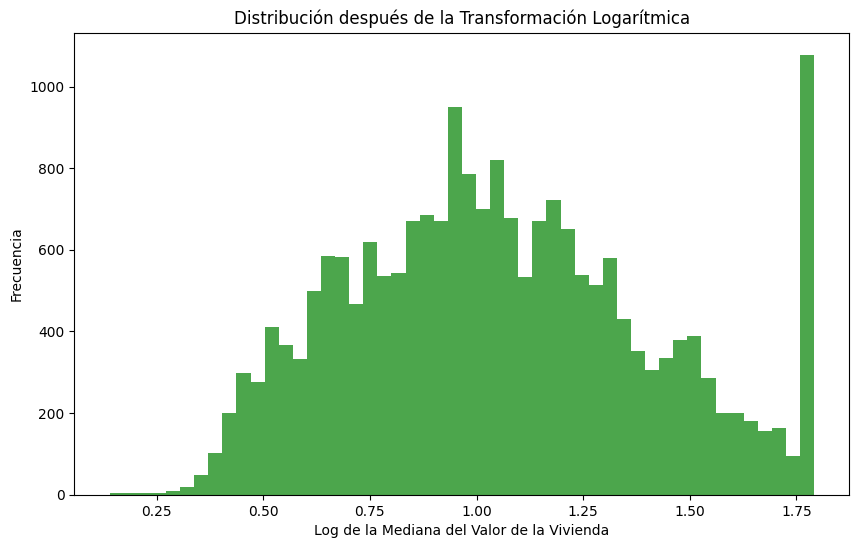

In [3]:
df['Log_MedHouseVal'] = np.log(df['MedHouseVal'] + 1)

plt.figure(figsize=(10,6))
plt.hist(df['Log_MedHouseVal'], bins=50, color='green', alpha=0.7)
plt.title('Distribución después de la Transformación Logarítmica')
plt.xlabel('Log de la Mediana del Valor de la Vivienda')
plt.ylabel('Frecuencia')
plt.show()


## raiz cuadrada

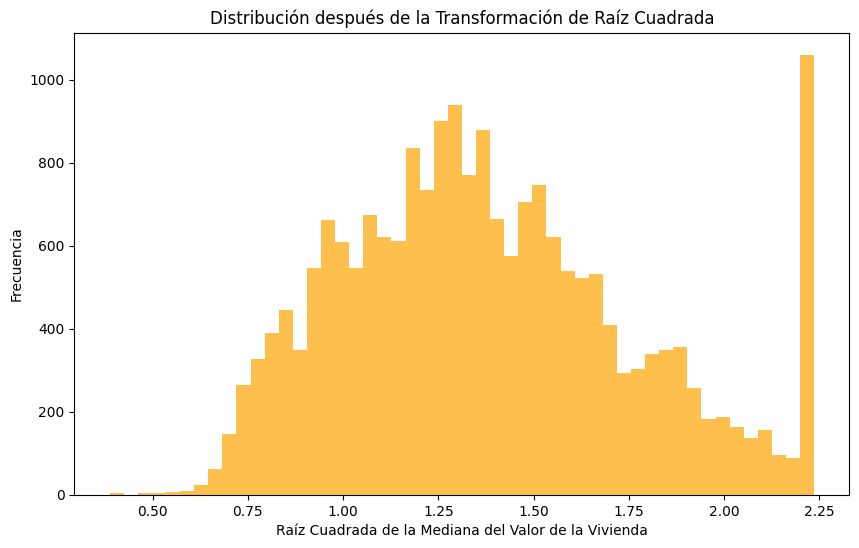

In [4]:
df['Sqrt_MedHouseVal'] = np.sqrt(df['MedHouseVal'])

plt.figure(figsize=(10,6))
plt.hist(df['Sqrt_MedHouseVal'], bins=50, color='orange', alpha=0.7)
plt.title('Distribución después de la Transformación de Raíz Cuadrada')
plt.xlabel('Raíz Cuadrada de la Mediana del Valor de la Vivienda')
plt.ylabel('Frecuencia')
plt.show()


##transf. inversa

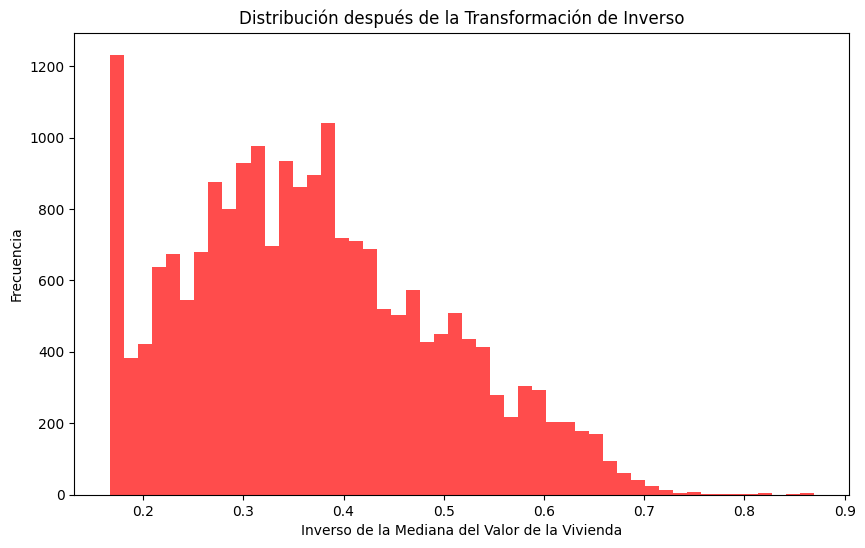

In [5]:
df['Inv_MedHouseVal'] = 1 / (df['MedHouseVal'] + 1)

plt.figure(figsize=(10,6))
plt.hist(df['Inv_MedHouseVal'], bins=50, color='red', alpha=0.7)
plt.title('Distribución después de la Transformación de Inverso')
plt.xlabel('Inverso de la Mediana del Valor de la Vivienda')
plt.ylabel('Frecuencia')
plt.show()


# SESGO NEGATIVO

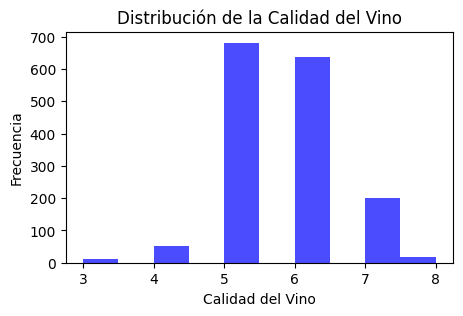

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Descargar el dataset directamente desde la web
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

# Visualización inicial de la distribución
plt.figure(figsize=(5,3))
plt.hist(df['quality'], bins=10, color='blue', alpha=0.7)
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad del Vino')
plt.ylabel('Frecuencia')
plt.show()


## transf. exponencial

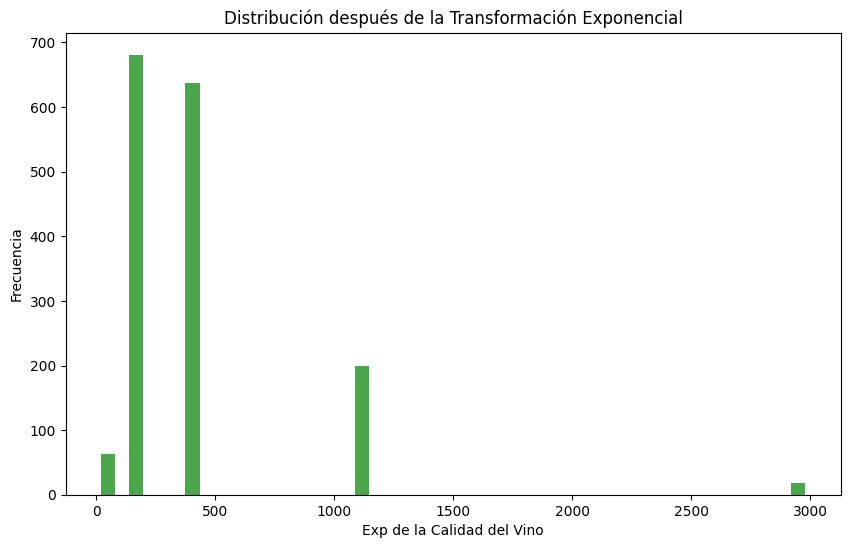

In [7]:
df['Exp_Quality'] = np.exp(df['quality']) - 1

plt.figure(figsize=(10,6))
plt.hist(df['Exp_Quality'], bins=50, color='green', alpha=0.7)
plt.title('Distribución después de la Transformación Exponencial')
plt.xlabel('Exp de la Calidad del Vino')
plt.ylabel('Frecuencia')
plt.show()


## tranf. potencia

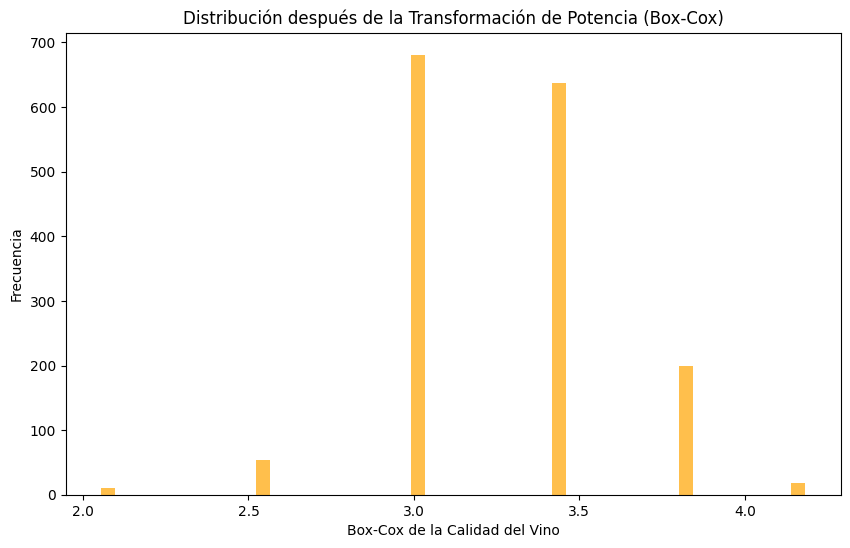

Valor óptimo de λ: 0.5343900735378277


In [8]:
from scipy import stats

# Aplicar transformación de Box-Cox
df['BoxCox_Quality'], fitted_lambda = stats.boxcox(df['quality'] + 1)  # +1 para evitar log(0)

plt.figure(figsize=(10,6))
plt.hist(df['BoxCox_Quality'], bins=50, color='orange', alpha=0.7)
plt.title('Distribución después de la Transformación de Potencia (Box-Cox)')
plt.xlabel('Box-Cox de la Calidad del Vino')
plt.ylabel('Frecuencia')
plt.show()

print(f'Valor óptimo de λ: {fitted_lambda}')


## trans. cubica

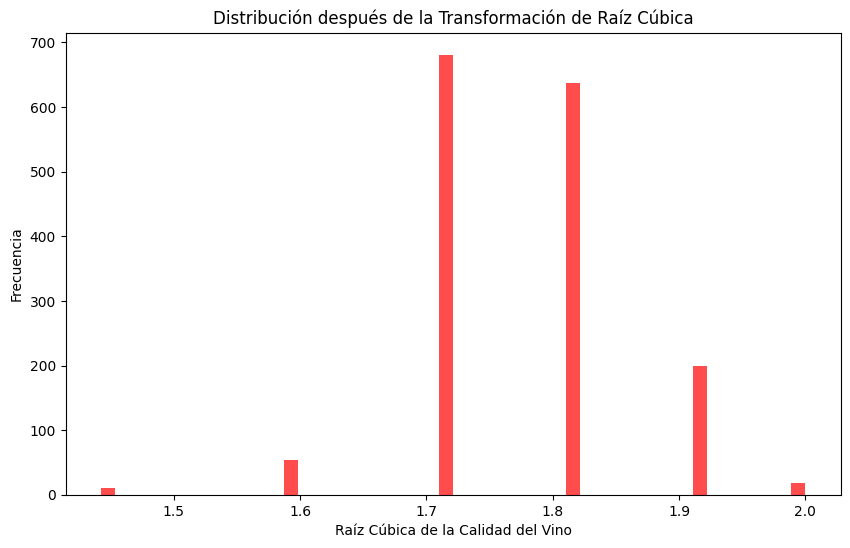

In [9]:
df['CubeRoot_Quality'] = np.cbrt(df['quality'])

plt.figure(figsize=(10,6))
plt.hist(df['CubeRoot_Quality'], bins=50, color='red', alpha=0.7)
plt.title('Distribución después de la Transformación de Raíz Cúbica')
plt.xlabel('Raíz Cúbica de la Calidad del Vino')
plt.ylabel('Frecuencia')
plt.show()


## otro ejm con sesgo negativo

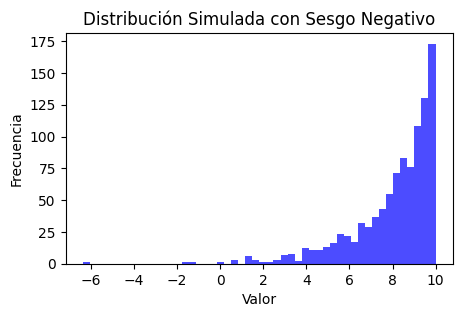

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generar datos simulados con sesgo negativo
np.random.seed(42)
data_neg_skew = np.random.exponential(scale=2, size=1000) * -1 + 10

# Crear un DataFrame
df_simulated = pd.DataFrame(data_neg_skew, columns=['value'])

# Visualización inicial de la distribución
plt.figure(figsize=(5,3))
plt.hist(df_simulated['value'], bins=50, color='blue', alpha=0.7)
plt.title('Distribución Simulada con Sesgo Negativo')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


## exponencial

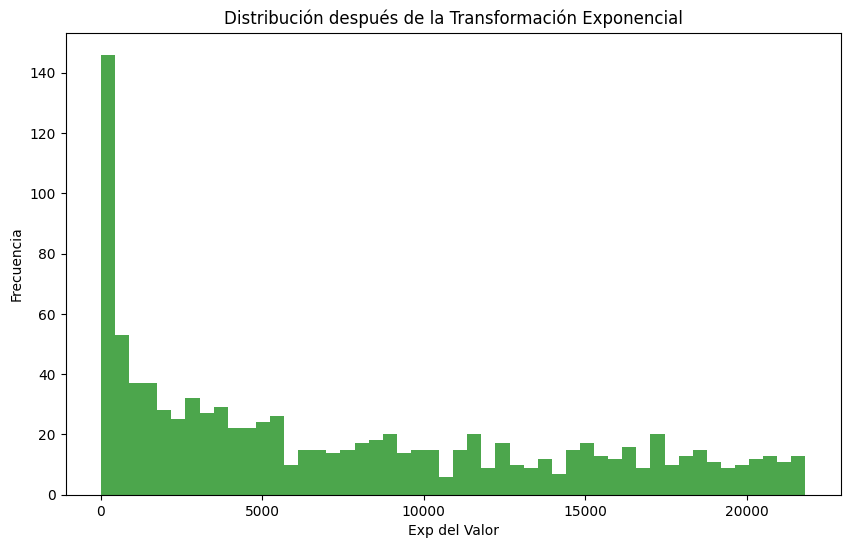

In [11]:
df_simulated['Exp_Value'] = np.exp(df_simulated['value']) - 1

plt.figure(figsize=(10,6))
plt.hist(df_simulated['Exp_Value'], bins=50, color='green', alpha=0.7)
plt.title('Distribución después de la Transformación Exponencial')
plt.xlabel('Exp del Valor')
plt.ylabel('Frecuencia')
plt.show()


## raiz cuadrada

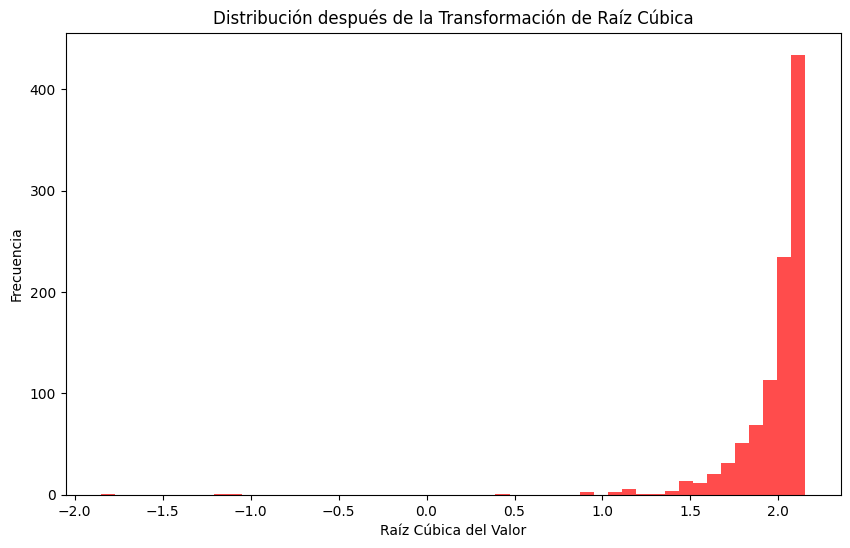

In [12]:
df_simulated['CubeRoot_Value'] = np.cbrt(df_simulated['value'])

plt.figure(figsize=(10,6))
plt.hist(df_simulated['CubeRoot_Value'], bins=50, color='red', alpha=0.7)
plt.title('Distribución después de la Transformación de Raíz Cúbica')
plt.xlabel('Raíz Cúbica del Valor')
plt.ylabel('Frecuencia')
plt.show()


# potencia box-cox

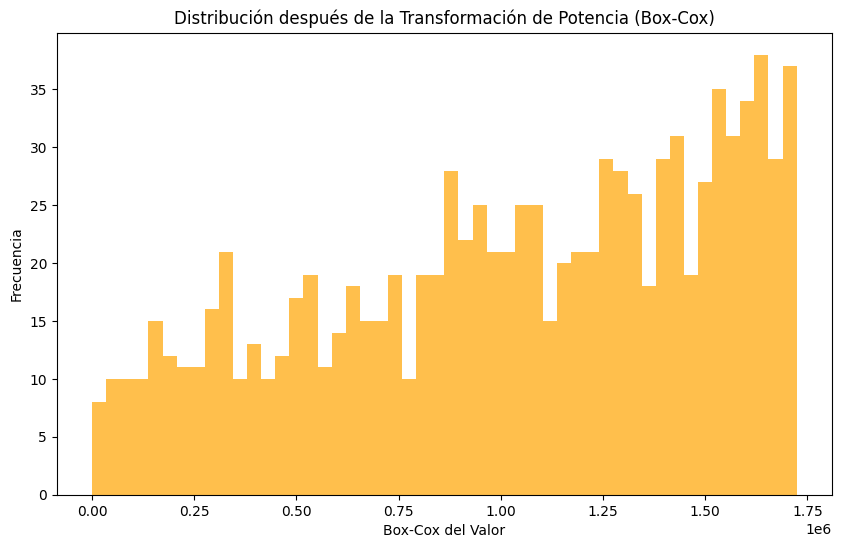

Valor óptimo de λ: 5.640143265082826


In [13]:
from scipy import stats

# Desplazar los datos para que todos sean positivos
shift_value = abs(min(df_simulated['value'])) + 1
shifted_data = df_simulated['value'] + shift_value

# Aplicar transformación de Box-Cox
df_simulated['BoxCox_Value'], fitted_lambda = stats.boxcox(shifted_data)

plt.figure(figsize=(10,6))
plt.hist(df_simulated['BoxCox_Value'], bins=50, color='orange', alpha=0.7)
plt.title('Distribución después de la Transformación de Potencia (Box-Cox)')
plt.xlabel('Box-Cox del Valor')
plt.ylabel('Frecuencia')
plt.show()

print(f'Valor óptimo de λ: {fitted_lambda}')


## raiz cubica

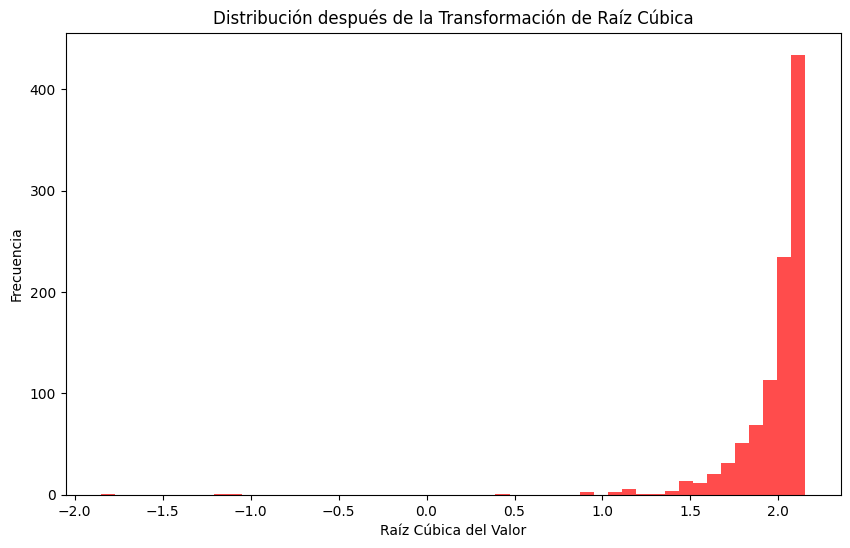

In [14]:
df_simulated['CubeRoot_Value'] = np.cbrt(df_simulated['value'])

plt.figure(figsize=(10,6))
plt.hist(df_simulated['CubeRoot_Value'], bins=50, color='red', alpha=0.7)
plt.title('Distribución después de la Transformación de Raíz Cúbica')
plt.xlabel('Raíz Cúbica del Valor')
plt.ylabel('Frecuencia')
plt.show()
